# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
from unityagents import UnityEnvironment
from collections import deque
import numpy as np
import torch

import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import mddpg_agent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [3]:
env = UnityEnvironment(file_name="C:/Users/pr8745/ud/deep-reinforcement-learning/p3_collab-compet/Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [6]:
p_scores = 0
for i in range(1, 5):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        #print("random actions: ", actions)
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        #print("next_states: ", next_states)
        rewards = env_info.rewards                         # get reward (for each agent)
        #print("rewards: ", rewards)
        dones = env_info.local_done                        # see if episode finished
        #print("dones: ", dones)
        scores += env_info.rewards                         # update the score (for each agent)
        for r in rewards:
            if r > 0:
                p_scores += 1
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}, {}'.format(i, p_scores, np.max(scores)))

Score (max over agents) from episode 1: 1, 0.09000000171363354
Score (max over agents) from episode 2: 1, 0.0
Score (max over agents) from episode 3: 1, 0.0
Score (max over agents) from episode 4: 1, 0.0


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [19]:
agents = [ mddpg_agent.Agent(state_size, action_size, 0), 
            mddpg_agent.Agent(state_size, action_size, 0) ]

n_episodes = 2000
scores_window = deque(maxlen=100)
scores_all = []
rolling_average = []

print ("start time: {}".format(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')))

for i_episode in range(1, n_episodes+1):
    env_info = env.reset(train_mode=True)[brain_name]
    states = env_info.vector_observations
    states = np.reshape(states, (1,48))
    agents[0].reset()
    agents[1].reset()
    scores = np.zeros(num_agents)
    while True:
        actions = [agents[0].act(states), agents[1].act(states)]         # Get actions from the agents
        #print("actions: {}".format(actions))
        actions = np.concatenate((actions[0], actions[1]), axis=1)
        #print("After concat actions: {}".format(actions))
        env_info = env.step(actions)[brain_name]                         # Send agent actions to env and get response
        next_states = env_info.vector_observations
        next_states = np.reshape(next_states, (1, 48))
        rewards = env_info.rewards
        done = env_info.local_done

        # Learn from env response
        agents[0].step(states, actions, rewards[0], next_states, done[0], 0, sum(rewards))
        agents[1].step(states, actions, rewards[1], next_states, done[1], 1, sum(rewards))
        
        #track scores
        scores += rewards
        
        states = next_states

        if np.any(done):
            break

    #track scores
    scores_window.append(np.max(scores))
    scores_all.append(np.max(scores))
    rolling_average.append(np.mean(scores_window))
        
    # report status
    if i_episode % 10 == 0:
        print('Episode {}\tAverage Reward: {:.3f}'.format(
            i_episode, np.mean(scores_window)))

    # Check if we solved the env
    if np.mean(scores_window)>=0.5:
        print('\nEnvironment solved in {:d} episodes.\tAverage Score: {:.3f}'.format(
            i_episode-100, np.mean(scores_window)))
        torch.save(agents[0].actor_local.state_dict(), 'checkpoint_actor_0.pth')
        torch.save(agents[0].critic_local.state_dict(), 'checkpoint_critic_0.pth')
        torch.save(agents[1].actor_local.state_dict(), 'checkpoint_actor_1.pth')
        torch.save(agents[1].critic_local.state_dict(), 'checkpoint_critic_1.pth')
        break

print ("end time: {}".format(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')))

start time: 2020-03-06 11:46:10
Episode 10	Average Reward: 0.000
Episode 20	Average Reward: 0.000
Episode 30	Average Reward: 0.000
Episode 40	Average Reward: 0.007
Episode 50	Average Reward: 0.006
Episode 60	Average Reward: 0.010
Episode 70	Average Reward: 0.013
Episode 80	Average Reward: 0.012
Episode 90	Average Reward: 0.011
Episode 100	Average Reward: 0.010
Episode 110	Average Reward: 0.010
Episode 120	Average Reward: 0.011
Episode 130	Average Reward: 0.011
Episode 140	Average Reward: 0.008
Episode 150	Average Reward: 0.009
Episode 160	Average Reward: 0.007
Episode 170	Average Reward: 0.005
Episode 180	Average Reward: 0.004
Episode 190	Average Reward: 0.007
Episode 200	Average Reward: 0.007
Episode 210	Average Reward: 0.011
Episode 220	Average Reward: 0.011
Episode 230	Average Reward: 0.013
Episode 240	Average Reward: 0.013
Episode 250	Average Reward: 0.013
Episode 260	Average Reward: 0.012
Episode 270	Average Reward: 0.013
Episode 280	Average Reward: 0.014
Episode 290	Average Rewar

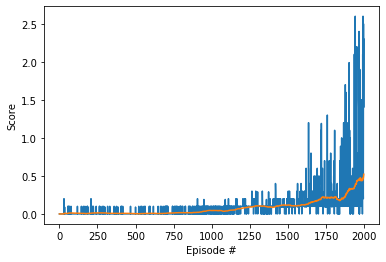

In [20]:
#plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_all)+1), scores_all)
plt.plot(np.arange(1, len(rolling_average)+1), rolling_average)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [24]:
# Load the saved training parameters
agents[0].actor_local.load_state_dict(torch.load('checkpoint_actor_0.pth', map_location='cpu'))
agents[0].critic_local.load_state_dict(torch.load('checkpoint_critic_0.pth', map_location='cpu'))
agents[1].actor_local.load_state_dict(torch.load('checkpoint_actor_1.pth', map_location='cpu'))
agents[1].critic_local.load_state_dict(torch.load('checkpoint_critic_1.pth', map_location='cpu'))

# Set environment to evalulation mode
env_info = env.reset(train_mode=False)[brain_name]        
states = env_info.vector_observations                  
states = np.reshape(states, (1,48))

for i in range(200):
    actions = [agents[0].act(states, add_noise=False), agents[1].act(states, add_noise=False)]
    actions = np.concatenate((actions[0], actions[1]), axis=0) 
    actions = np.reshape(actions, (1, 4))
    env_info = env.step(actions)[brain_name]        
    next_states = env_info.vector_observations        
    next_states = np.reshape(next_states, (1, 48))
    rewards = env_info.rewards                        
    dones = env_info.local_done                 
    states = next_states                              
    if np.any(dones):                              
        break

When finished, you can close the environment.

In [25]:
env.close()